In [12]:
import pandas as pd
from utils.db import get_inspect_database_uri
from sqlalchemy import create_engine, text

conn = create_engine(get_inspect_database_uri()).connect()
ver_query = """
    SELECT block_number
    FROM contracts
"""
contracts_df = pd.DataFrame(conn.execute(text(ver_query)))
contracts_df.sort_values(by="eth_balance", ascending=False, inplace=True)

In [13]:
contracts_df[contracts_df.eth_balance > 1]

,contract_address,verified,contract_name,compiler_version,evm_version,proxy,eth_balance
697,0xF42c318dbfBaab0EEE040279C6a2588Fa01a961d,true,AkuAuction,v0.8.13+commit.abaa5c0e,Default,0,11539.500000
8693,0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577,true,Vyper_contract,vyper:0.3.7,Default,0,4203.246601
10335,0x7623e9DC0DA6FF821ddb9EbABA794054E078f8c4,true,EarlyAdopterPool,v0.8.13+commit.abaa5c0e,Default,0,1376.452351
11665,0xBfAb6FA95E0091ed66058ad493189D2cB29385E6,true,Vyper_contract,vyper:0.3.7,Default,0,941.246067
10066,0x253553366Da8546fC250F225fe3d25d0C782303b,true,ETHRegistrarController,v0.8.17+commit.8df45f5f,Default,0,927.235153
...,...,...,...,...,...,...,...
13653,0x4A8a90a0586A63B82C51F3dECb436E5022DD7b37,true,KAIDO,v0.8.20+commit.a1b79de6,Default,0,1.001857
15715,0x7863e06bca47DED821FCb53ab788EEb371243EdA,true,PresidentRobertFKennedyJr,v0.8.18+commit.87f61d96,Default,0,1.001716
1187,0xbcE0C70A10D374F0fcDa6d37274915f6a8134286,true,MintManager,v0.8.9+commit.e5eed63a,Default,0,1.000200
15838,0x781696052fBb5406E28626c6162307b26a4Dc1bE,true,OrangePepeCoin,v0.8.17+commit.8df45f5f,Default,0,1.000100


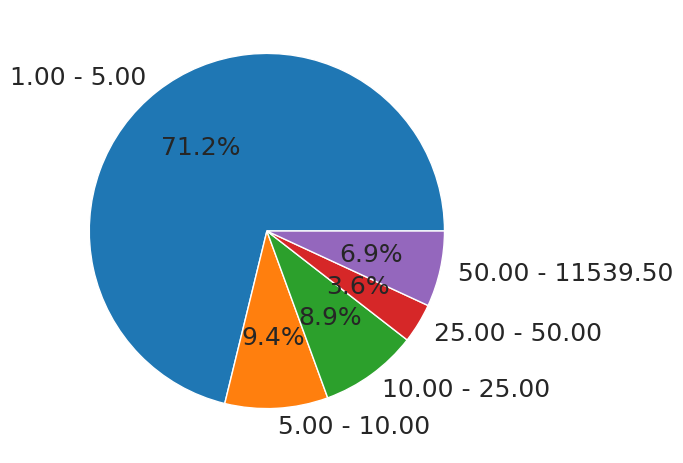

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

FONT_SIZE = 12

# Set seaborn style
sns.set_style("whitegrid")

# Define custom bins for the histogram
bins = [1, 5, 10, 25, 50, contracts_df.eth_balance.max()]

hist, bin_edges = np.histogram(contracts_df[contracts_df.eth_balance >= 1].eth_balance, bins=bins)

# Get the labels for the pie chart
labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
# Plot the pie chart
plt.pie(hist, labels=labels, autopct='%1.1f%%')

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/eth_distribution.png', dpi=300)  # Save the plot as an image
plt.show()

0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577,Vyper_contract: timestamp is used for
0xb7Fd36eB847C04A144FAb717e85B94DA1d8c9b4e,Vyper_contract

0xc9d7bd1Fad7D5621DdA20335818E9575Ae07Ea03,MintedTokenCappedCrowdsaleExtv1
0x8C96EdC82d111E3c5686F5ABE738A82d54d0b887,SuperVerseStaker

0x0CBa81Ba02c58A4C2C160fdD2E7411AD9cdf5Dbe,Auction
0x1EcB59aEcF1fC5da695242C6E78C2007E775d40F,Auction

0xD1CE90003a10E6daB877890aB1fD96511555E4b3,Dice9: A random gambling game. Could tamper with VRF and payments.

0x3071BE11F9e92A9eb28F305e1Fa033cD102714e7,Proxy
0x1390f521A79BaBE99b69B37154D63D431da27A07,Proxy: Proxy contract. Governance can be manipulated.

0x397b102dECcACE4AA8E5bA63EeDb8e65ad83E20c,EncryptionAIContract: Can easily manipulate locks for buys and ownership transfers

0x165f848F980309f6147b8adfC8589cc35c587Ca7,BitcoinCowsBridge: Random seed can be manipulated

0xa2E3356610840701BDf5611a53974510Ae27E2e1,FiatTokenProxy: Oddly has no implementation

0x41d3d86a84c8507A7Bc14F2491ec4d188FA944E7,MoneyMakingOpportunity: One can double their money by entering this auction with x NFTs, x other NFTs are present. Then lock the claim until the deadline, then take the minted tokens with half the votes.

0xfa1B15dF09c2944a91A2F9F10A6133090d4119BD,ERC1155BurnRedeem: Can probably burn and wait until redeem deadline



In [15]:
import pandas as pd
from sqlalchemy import create_engine, text
from utils.db import get_inspect_database_uri

In [16]:
conn = create_engine(get_inspect_database_uri()).connect()
# post merge
query = f"SELECT * FROM contracts_info"
contracts_df = pd.DataFrame(conn.execute(text(query)))
contracts_df

,contract_address,eth_balance,largest_tx_hash,largest_tx_block_number,largest_tx_value
0,0x4E568Fa05bD656F358f572bE663bcC5dfC9162ae,2.796505e-02,None,None,None
1,0xEb1d77cD6D9EF2F755Bb78e531bfB666E2C24B50,2.473963e-02,None,None,None
2,0x930026539b3eA3D67d3636852b0C350c2A2341b0,1.000000e-18,None,None,None
3,0x30983b29a00fFEe6A7aE94e9715A6E3Bec63d72c,4.057586e-02,None,None,None
4,0x3A3427cb9cE4c8FE213768cca4c2cB050FACfCc2,6.177598e-05,None,None,None
...,...,...,...,...,...
19945,0x1648dCFc4f0DF1cdb68854B0cCBE282E31722bf4,3.000000e-02,None,None,None
19946,0x3924A38b90aC6BA65F43f36239071a15e400f3d5,3.190289e-04,None,None,None
19947,0x49a32B69d84fA85C5103eE5bAA6D6072FFe356A9,5.000000e-03,None,None,None
19948,0xc95d4eDF93d47D4d889407dD88Ae38dDb75D65e2,1.980000e-05,None,None,None


In [17]:
contracts_df[contracts_df.eth_balance < 1]

,contract_address,eth_balance,largest_tx_hash,largest_tx_block_number,largest_tx_value
0,0x4E568Fa05bD656F358f572bE663bcC5dfC9162ae,2.796505e-02,None,None,None
1,0xEb1d77cD6D9EF2F755Bb78e531bfB666E2C24B50,2.473963e-02,None,None,None
2,0x930026539b3eA3D67d3636852b0C350c2A2341b0,1.000000e-18,None,None,None
3,0x30983b29a00fFEe6A7aE94e9715A6E3Bec63d72c,4.057586e-02,None,None,None
4,0x3A3427cb9cE4c8FE213768cca4c2cB050FACfCc2,6.177598e-05,None,None,None
...,...,...,...,...,...
19945,0x1648dCFc4f0DF1cdb68854B0cCBE282E31722bf4,3.000000e-02,None,None,None
19946,0x3924A38b90aC6BA65F43f36239071a15e400f3d5,3.190289e-04,None,None,None
19947,0x49a32B69d84fA85C5103eE5bAA6D6072FFe356A9,5.000000e-03,None,None,None
19948,0xc95d4eDF93d47D4d889407dD88Ae38dDb75D65e2,1.980000e-05,None,None,None


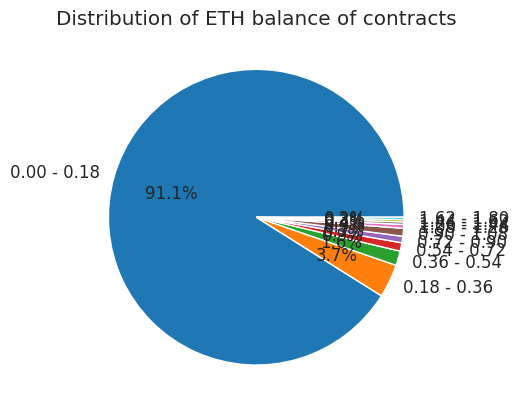

In [18]:
# plot the distribution of the contracts eth balance
import matplotlib.pyplot as plt
import numpy as np

mean_eth_balance = contracts_df.eth_balance.mean()
# get the bins of the histogram for the pie chart
hist, bin_edges = np.histogram(contracts_df[contracts_df.eth_balance < mean_eth_balance].eth_balance, bins=10)
# get the labels for the pie chart
labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
# plot the pie chart
plt.pie(hist, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of ETH balance of contracts")

plt.show()

In [19]:
contracts_df.describe()

,eth_balance
count,1.995000e+04
mean,1.804559e+00
std,8.929823e+01
min,1.000000e-18
25%,1.765000e-16
50%,4.200000e-03
75%,3.787382e-02
max,1.153950e+04


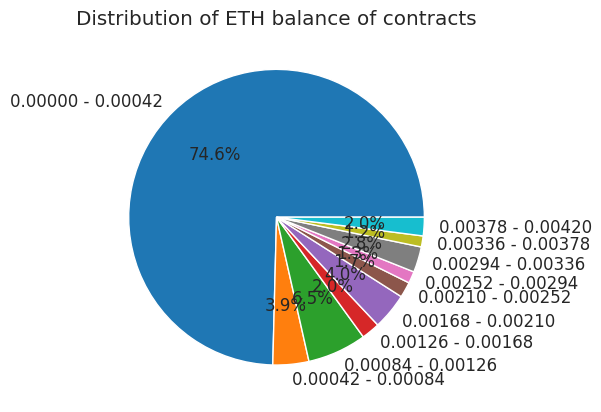

In [20]:
mean_eth_balance = 4.200000e-03
# get the bins of the histogram for the pie chart
hist, bin_edges = np.histogram(contracts_df[contracts_df.eth_balance < mean_eth_balance].eth_balance, bins=10)
# get the labels for the pie chart
labels = [f"{bin_edges[i]:.5f} - {bin_edges[i+1]:.5f}" for i in range(len(bin_edges)-1)]
# plot the pie chart
plt.pie(hist, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of ETH balance of contracts")

plt.show()

In [21]:
conn = create_engine(get_inspect_database_uri()).connect()
# post merge
query = "SELECT contract_address, from_address FROM contracts"
# rows are like this: (0x04Ce11f8c8067F6Be17C37E9bFaF5804471fcc42,0x58F56615180A8eeA4c462235D9e215F72484B4A3)
# we want to get the from_address and contract_address
result = conn.execute(text(query)).fetchall()

# Create the DataFrame from the fetched result
contracts_df = pd.DataFrame(result, columns=["contract_address", "from_address"])
contracts_df

,contract_address,from_address
0,0x0c3761189691E505379B565680ac78c76d538710,0x6726f4256c90bC9F2A0d1D161804CE5e4e14AF05
1,0x2C2eB240a0E5bE848e953F24D2727aF45265DDb3,0xe03677a5CbFB3f6217211d1c8AA7BF8b9c120aed
2,0xaF56D16a7fe479F2fcD48FF567fF589CB2d2a0E9,0xf8E5227aDD01b2b8f36981a2566c160E5E4136e4
3,0xb4236690EFFf8C422e6BCA188319Bc8791B8272F,0x44A9DF5ef5B4fEA2019FDfFaa79d9072f72bee1A
4,0x3a1710735950916b63b600d5B998a248e0D0bf0b,0x44A9DF5ef5B4fEA2019FDfFaa79d9072f72bee1A
...,...,...
271855,0x9236994723354dD2447708Ae878780b2eaf9a642,0x7b8D54acC9301ff75F386AbBFBb4e6752b24329e
271856,0x5f0a509cE9DF04b8F74BC0304c2acc7de240BbFe,0x67E21394bBC46c010D9B8DCf00172Ab7996964BE
271857,0x4eE9DDfC2ede97960E491D8dc17c44eC4C59e9aF,0x67E21394bBC46c010D9B8DCf00172Ab7996964BE
271858,0x76f9E68c8F92aE03701901b67c1689dc55dD0F8A,0x67E21394bBC46c010D9B8DCf00172Ab7996964BE


In [22]:
contracts_df['from_address'].value_counts()

from_address
0x58F56615180A8eeA4c462235D9e215F72484B4A3    3330
0xfA9dA51631268A30Ec3DDd1CcBf46c65FAD99251     325
0xa31d555b08fAA0701cb0a8B2A334f7fC629984CF     282
0x7a403E1a481235b10F92D950809Baa8b705D7BE0     199
0x11799622F4D98A24514011E8527B969f7488eF47     186
                                              ... 
0xf8B4D4d6D82ADB803748c2Ef359f02F5C286AC3A       1
0x3ccB6ABeFD8cA450fBf124041c1D1093029e6A70       1
0x0bf2c90Cc7A8e5a35C601f25eB925ad0ACd15D74       1
0x9F7444d07bA48f9c2cBD95B4741cBb037d46c649       1
0x603D9b0a40fe90DC605e1f64BBE87d94cdFA1Bf8       1
Name: count, Length: 196765, dtype: int64